## Import Library

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter # Untuk memformat angka pada sumbu y (misalnya sebagai persen atau format angka lain)
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from scipy.optimize import curve_fit
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu

## Loading Data

In [2]:
# Data Loading Fact GDP
df_factGDP = pd.read_csv('/Users/bee/final-project-final-project-coda-003-rmt-group-001 copy/fact_GDP.csv')
df_factGDP.head()

,country,year,gdp
0,Aruba,1960,NaN
1,Africa Eastern and Southern,1960,NaN
2,Afghanistan,1960,NaN
3,Africa Western and Central,1960,NaN
4,Angola,1960,NaN


In [3]:
# Data Loading Fact Education
df_factedu = pd.read_csv('/Users/bee/final-project-final-project-coda-003-rmt-group-001 copy/fact_edu.csv')
df_factedu.head()

,country,completion_rate,dropout_rate,unemployment_rate
0,Afghanistan,23.0,56.5,11.12
1,Albania,78.0,18.0,12.33
2,Algeria,29.5,0.0,11.70
3,Andorra,0.0,0.0,0.00
4,Angola,19.5,0.0,6.89


In [4]:
# Data Loading Fact Intentional Homicide
df_facthomi = pd.read_csv('/Users/bee/final-project-final-project-coda-003-rmt-group-001 copy/fact_homi.csv')
df_facthomi.head()

,country,year,nummber_convicted_for_intentional_homicide,rate_per_100k_population
0,Albania,2003,158.0,5.067209
1,Armenia,2003,73.0,2.402131
2,Austria,2003,37.0,0.455519
3,Bulgaria,2003,134.0,1.716978
4,Bahrain,2003,1.0,0.123263


In [5]:
# Data Loading dim country
df_dimcountry = pd.read_csv('/Users/bee/final-project-final-project-coda-003-rmt-group-001 copy/dim_country.csv')
df_dimcountry.head()

,country,latitude,longitude,region,subregion,country_code,country_status
0,Afghanistan,33.939110,67.709953,Asia,Southern Asia,AFG,Conflict Zone
1,Albania,41.153332,20.168331,Europe,Southern Europe,ALB,Middle Income
2,Algeria,28.033886,1.659626,Africa,Northern Africa,DZA,Middle Income
3,Andorra,42.506285,1.521801,Europe,Southern Europe,AND,High Income
4,Angola,11.202692,17.873887,Africa,Sub-Saharan Africa,AGO,Middle Income


## Extract

In [6]:
# # Hanya akan mengambil data tahun 2021 pada Fact GDP 
df_factGDP = df_factGDP[
                        (df_factGDP['year'] == 2021)] 
df_factGDP.head()

,country,year,gdp
16226,Aruba,2021,NaN
16227,Africa Eastern and Southern,2021,"4,771326065"
16228,Afghanistan,2021,NaN
16229,Africa Western and Central,2021,"3,203484297"
16230,Angola,2021,"2,297108889"


In [7]:
# Hanya akan mengambil data tahun 2021 pada Fact Intentional Homicide 
df_facthomi = df_facthomi[
                        (df_facthomi['year'] == 2021)] 
df_facthomi.head()

,country,year,nummber_convicted_for_intentional_homicide,rate_per_100k_population
1168,Albania,2021,96.0,3.368852
1169,Argentina,2021,2591.0,5.718097
1170,Antigua and Barbuda,2021,0.0,0.000000
1171,Australia,2021,76.0,0.292798
1172,Austria,2021,39.0,0.434925


In [8]:
# Ambil data yang dibutuhkan
# ==============================

# Standarisasi nama kolom sebelum merge
df_edu = df_factedu.rename(columns={'country': 'country'})
df_gdp = df_factGDP.rename(columns={'country': 'country'})
df_dimcountry = df_dimcountry.rename(columns={'country': 'country'})
df_homi = df_facthomi.rename(columns={'country': 'country'})

# Standarisasi format nama negara (lowercase & strip spaces)
df_edu['country'] = df_edu['country'].str.lower().str.strip()
df_gdp['country'] = df_gdp['country'].str.lower().str.strip()
df_dimcountry['country'] = df_dimcountry['country'].str.lower().str.strip()
df_homi['country'] = df_homi['country'].str.lower().str.strip()

# df_homi_grouped = df_homi.groupby("country", as_index=False).agg({
#     "rate_per_100k_population": "mean"  # Hitung rata-rata per negara
#     # "homicide_number": "sum"  # (Opsional) Bisa pakai sum jika ingin total
# })
# df_final = df_edu \
#     .merge(df_gdp, on="country", how="left") \
#     .merge(df_homi_grouped, on="country", how="left") \  
#     .merge(df_dimcountry, on="country", how="left")


df = df_edu \
    .merge(df_gdp, on="country", how="left") \
    .merge(df_homi, on="country", how="left") \
    .merge(df_dimcountry, on="country", how="left")

# Ganti nama kolom agar lebih deskriptif
df.rename(columns={
    'year_x': 'year',
    'nummber_convicted_for_intentional_homicide':'num_convicted_for_intentional_homicide' 
}, inplace=True)

df = df.drop(columns=["year_y"]) 


# Tampilkan hasil
df.head()

,country,completion_rate,dropout_rate,unemployment_rate,year,gdp,num_convicted_for_intentional_homicide,rate_per_100k_population,latitude,longitude,region,subregion,country_code,country_status
0,afghanistan,23.0,56.5,11.12,2021.0,NaN,NaN,NaN,33.939110,67.709953,Asia,Southern Asia,AFG,Conflict Zone
1,albania,78.0,18.0,12.33,2021.0,"3,022559881",96.0,3.368852,41.153332,20.168331,Europe,Southern Europe,ALB,Middle Income
2,algeria,29.5,0.0,11.70,2021.0,"5,514032841",594.0,1.327045,28.033886,1.659626,Africa,Northern Africa,DZA,Middle Income
3,andorra,0.0,0.0,0.00,2021.0,"2,583972216",NaN,NaN,42.506285,1.521801,Europe,Southern Europe,AND,High Income
4,angola,19.5,0.0,6.89,2021.0,"2,297108889",NaN,NaN,11.202692,17.873887,Africa,Sub-Saharan Africa,AGO,Middle Income


## Eksplorasi Data

In [9]:
df.head()

,country,completion_rate,dropout_rate,unemployment_rate,year,gdp,num_convicted_for_intentional_homicide,rate_per_100k_population,latitude,longitude,region,subregion,country_code,country_status
0,afghanistan,23.0,56.5,11.12,2021.0,NaN,NaN,NaN,33.939110,67.709953,Asia,Southern Asia,AFG,Conflict Zone
1,albania,78.0,18.0,12.33,2021.0,"3,022559881",96.0,3.368852,41.153332,20.168331,Europe,Southern Europe,ALB,Middle Income
2,algeria,29.5,0.0,11.70,2021.0,"5,514032841",594.0,1.327045,28.033886,1.659626,Africa,Northern Africa,DZA,Middle Income
3,andorra,0.0,0.0,0.00,2021.0,"2,583972216",NaN,NaN,42.506285,1.521801,Europe,Southern Europe,AND,High Income
4,angola,19.5,0.0,6.89,2021.0,"2,297108889",NaN,NaN,11.202692,17.873887,Africa,Sub-Saharan Africa,AGO,Middle Income


In [10]:
# Cek struktur data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   country                                 202 non-null    object 
 1   completion_rate                         202 non-null    float64
 2   dropout_rate                            202 non-null    float64
 3   unemployment_rate                       202 non-null    float64
 4   year                                    166 non-null    float64
 5   gdp                                     142 non-null    object 
 6   num_convicted_for_intentional_homicide  65 non-null     float64
 7   rate_per_100k_population                65 non-null     float64
 8   latitude                                202 non-null    float64
 9   longitude                               202 non-null    float64
 10  region                                  155 non-null    object

In [11]:
# Cek Missing Value

# Hitung total nilai yang hilang per kolom
missing_counts = df.isnull().sum()

# Hitung persentase nilai yang hilang per kolom
missing_percentage = (missing_counts / len(df)) * 100

# Gabungkan hasil menjadi DataFrame
missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage (%)': missing_percentage
})

print(missing_summary)

                                        Missing Count  Missing Percentage (%)
country                                             0                0.000000
completion_rate                                     0                0.000000
dropout_rate                                        0                0.000000
unemployment_rate                                   0                0.000000
year                                               36               17.821782
gdp                                                60               29.702970
num_convicted_for_intentional_homicide            137               67.821782
rate_per_100k_population                          137               67.821782
latitude                                            0                0.000000
longitude                                           0                0.000000
region                                             47               23.267327
subregion                                          47           

In [12]:
# Cek Duplicate Data
duplikasi = df.duplicated()
print(f"Jumlah baris duplikat: {duplikasi.sum()}")

Jumlah baris duplikat: 0


## Data Cleaning

In [13]:
# Gantilah koma (,) dengan titik (.) agar bisa dikonversi ke float
df['gdp'] = df['gdp'].astype(str).str.replace(',', '.')

# Konversi ke float
df['gdp'] = pd.to_numeric(df['gdp'], errors='coerce')

# Isi nilai NaN dengan tahun 2021 dan mengganti tipe datanya ke int
df["year"] = df["year"].fillna(2021).astype(int)

# Tampilkan tipe data setelah konversi
print(df.dtypes)

country                                    object
completion_rate                           float64
dropout_rate                              float64
unemployment_rate                         float64
year                                        int64
gdp                                       float64
num_convicted_for_intentional_homicide    float64
rate_per_100k_population                  float64
latitude                                  float64
longitude                                 float64
region                                     object
subregion                                  object
country_code                               object
country_status                             object
dtype: object


In [14]:
# Membulatkan kolom 'GDP 2021' ke 2 desimal
df['gdp'] = df['gdp'].round(2)

In [15]:
# Cek Missing Value

# Hitung total nilai yang hilang per kolom
missing_counts = df.isnull().sum()

# Hitung persentase nilai yang hilang per kolom
missing_percentage = (missing_counts / len(df)) * 100

# Gabungkan hasil menjadi DataFrame
missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage (%)': missing_percentage
})

print(missing_summary)

                                        Missing Count  Missing Percentage (%)
country                                             0                0.000000
completion_rate                                     0                0.000000
dropout_rate                                        0                0.000000
unemployment_rate                                   0                0.000000
year                                                0                0.000000
gdp                                                60               29.702970
num_convicted_for_intentional_homicide            137               67.821782
rate_per_100k_population                          137               67.821782
latitude                                            0                0.000000
longitude                                           0                0.000000
region                                             47               23.267327
subregion                                          47           

In [16]:
df.head()

,country,completion_rate,dropout_rate,unemployment_rate,year,gdp,num_convicted_for_intentional_homicide,rate_per_100k_population,latitude,longitude,region,subregion,country_code,country_status
0,afghanistan,23.0,56.5,11.12,2021,NaN,NaN,NaN,33.939110,67.709953,Asia,Southern Asia,AFG,Conflict Zone
1,albania,78.0,18.0,12.33,2021,3.02,96.0,3.368852,41.153332,20.168331,Europe,Southern Europe,ALB,Middle Income
2,algeria,29.5,0.0,11.70,2021,5.51,594.0,1.327045,28.033886,1.659626,Africa,Northern Africa,DZA,Middle Income
3,andorra,0.0,0.0,0.00,2021,2.58,NaN,NaN,42.506285,1.521801,Europe,Southern Europe,AND,High Income
4,angola,19.5,0.0,6.89,2021,2.30,NaN,NaN,11.202692,17.873887,Africa,Sub-Saharan Africa,AGO,Middle Income


In [17]:
# Isi missing value Model Prediksi
# Import library yang diperlukan
from sklearn.impute import KNNImputer
import pandas as pd

# Daftar kolom yang ingin diimputasi
cols_to_impute = ["gdp","completion_rate", "dropout_rate", "unemployment_rate", 
                "num_convicted_for_intentional_homicide", "rate_per_100k_population"]

# Membuat objek KNNImputer (gunakan 5 tetangga sebagai default)
imputer = KNNImputer(n_neighbors=5)

# Pastikan data tidak mengandung kategori sebelum imputasi
df[cols_to_impute] = imputer.fit_transform(df[cols_to_impute])

# Cek apakah masih ada missing values
print(df[cols_to_impute].isnull().sum())

# handling missing value dengan nilai spesifik
df.fillna({
    "region": "unknown",
    "subregion": "unknown",
    "country_status": "unknown",
    "country_code": "none"
}, inplace=True)

# Cek kembali apakah masih ada missing value
print(df.isnull().sum())

gdp                                       0
completion_rate                           0
dropout_rate                              0
unemployment_rate                         0
num_convicted_for_intentional_homicide    0
rate_per_100k_population                  0
dtype: int64
country                                   0
completion_rate                           0
dropout_rate                              0
unemployment_rate                         0
year                                      0
gdp                                       0
num_convicted_for_intentional_homicide    0
rate_per_100k_population                  0
latitude                                  0
longitude                                 0
region                                    0
subregion                                 0
country_code                              0
country_status                            0
dtype: int64


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   country                                 202 non-null    object 
 1   completion_rate                         202 non-null    float64
 2   dropout_rate                            202 non-null    float64
 3   unemployment_rate                       202 non-null    float64
 4   year                                    202 non-null    int64  
 5   gdp                                     202 non-null    float64
 6   num_convicted_for_intentional_homicide  202 non-null    float64
 7   rate_per_100k_population                202 non-null    float64
 8   latitude                                202 non-null    float64
 9   longitude                               202 non-null    float64
 10  region                                  202 non-null    object

In [19]:
df.head()

,country,completion_rate,dropout_rate,unemployment_rate,year,gdp,num_convicted_for_intentional_homicide,rate_per_100k_population,latitude,longitude,region,subregion,country_code,country_status
0,afghanistan,23.0,56.5,11.12,2021,2.866,2816.8,6.786945,33.939110,67.709953,Asia,Southern Asia,AFG,Conflict Zone
1,albania,78.0,18.0,12.33,2021,3.020,96.0,3.368852,41.153332,20.168331,Europe,Southern Europe,ALB,Middle Income
2,algeria,29.5,0.0,11.70,2021,5.510,594.0,1.327045,28.033886,1.659626,Africa,Northern Africa,DZA,Middle Income
3,andorra,0.0,0.0,0.00,2021,2.580,46.0,0.355819,42.506285,1.521801,Europe,Southern Europe,AND,High Income
4,angola,19.5,0.0,6.89,2021,2.300,156.4,1.421610,11.202692,17.873887,Africa,Sub-Saharan Africa,AGO,Middle Income


Situasional Variabel

In [22]:
# Menghapus baris yang memiliki GDP= 0
df_cleaned_gdp = df[(df["gdp"] != 0)]

# Menampilkan beberapa baris pertama
df_cleaned_gdp.head()

,country,completion_rate,dropout_rate,unemployment_rate,year,gdp,num_convicted_for_intentional_homicide,rate_per_100k_population,latitude,longitude,region,subregion,country_code,country_status
0,afghanistan,23.0,56.5,11.12,2021,2.866,2816.8,6.786945,33.939110,67.709953,Asia,Southern Asia,AFG,Conflict Zone
1,albania,78.0,18.0,12.33,2021,3.020,96.0,3.368852,41.153332,20.168331,Europe,Southern Europe,ALB,Middle Income
2,algeria,29.5,0.0,11.70,2021,5.510,594.0,1.327045,28.033886,1.659626,Africa,Northern Africa,DZA,Middle Income
3,andorra,0.0,0.0,0.00,2021,2.580,46.0,0.355819,42.506285,1.521801,Europe,Southern Europe,AND,High Income
4,angola,19.5,0.0,6.89,2021,2.300,156.4,1.421610,11.202692,17.873887,Africa,Sub-Saharan Africa,AGO,Middle Income


In [23]:
df_cleaned_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   country                                 202 non-null    object 
 1   completion_rate                         202 non-null    float64
 2   dropout_rate                            202 non-null    float64
 3   unemployment_rate                       202 non-null    float64
 4   year                                    202 non-null    int64  
 5   gdp                                     202 non-null    float64
 6   num_convicted_for_intentional_homicide  202 non-null    float64
 7   rate_per_100k_population                202 non-null    float64
 8   latitude                                202 non-null    float64
 9   longitude                               202 non-null    float64
 10  region                                  202 non-null    object

In [30]:
df_cleaned_gdp_cr = df_cleaned_gdp[df_cleaned_gdp["completion_rate"] != 0]
df_cleaned_gdp_cr.info()


<class 'pandas.core.frame.DataFrame'>
Index: 107 entries, 0 to 201
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   country                                 107 non-null    object 
 1   completion_rate                         107 non-null    float64
 2   dropout_rate                            107 non-null    float64
 3   unemployment_rate                       107 non-null    float64
 4   year                                    107 non-null    int64  
 5   gdp                                     107 non-null    float64
 6   num_convicted_for_intentional_homicide  107 non-null    float64
 7   rate_per_100k_population                107 non-null    float64
 8   latitude                                107 non-null    float64
 9   longitude                               107 non-null    float64
 10  region                                  107 non-null    object 
 11

In [22]:
# Menghapus baris yang memiliki Completion Rate = 0
df_cleaned_cr = df[(df["completion_rate"] != 0)]

# Menampilkan beberapa baris pertama
df_cleaned_cr.head()

,country,completion_rate,dropout_rate,unemployment_rate,year,gdp,num_convicted_for_intentional_homicide,rate_per_100k_population,latitude,longitude,region,subregion,country_code,country_status
0,afghanistan,23.0,56.5,11.12,2021,0.00,0.0,0.000000,33.939110,67.709953,Asia,Southern Asia,AFG,Conflict Zone
1,albania,78.0,18.0,12.33,2021,3.02,96.0,3.368852,41.153332,20.168331,Europe,Southern Europe,ALB,Middle Income
2,algeria,29.5,0.0,11.70,2021,5.51,594.0,1.327045,28.033886,1.659626,Africa,Northern Africa,DZA,Middle Income
4,angola,19.5,0.0,6.89,2021,2.30,0.0,0.000000,11.202692,17.873887,Africa,Sub-Saharan Africa,AGO,Middle Income
7,argentina,49.5,11.0,9.79,2021,4.64,2591.0,5.718097,38.416097,63.616672,Americas,Latin America and the Caribbean,ARG,Middle Income


In [23]:
df_cleaned_cr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107 entries, 0 to 201
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   country                                 107 non-null    object 
 1   completion_rate                         107 non-null    float64
 2   dropout_rate                            107 non-null    float64
 3   unemployment_rate                       107 non-null    float64
 4   year                                    107 non-null    int64  
 5   gdp                                     107 non-null    float64
 6   num_convicted_for_intentional_homicide  107 non-null    float64
 7   rate_per_100k_population                107 non-null    float64
 8   latitude                                107 non-null    float64
 9   longitude                               107 non-null    float64
 10  region                                  107 non-null    object 
 11

In [24]:
# Menghapus baris yang memiliki Completion Rate & GDP = 0
df_cleaned_gdp_cr = df[(df["completion_rate"] != 0) & 
                        (df["gdp"] != 0)]

# Menampilkan beberapa baris pertama
df_cleaned_gdp_cr.head()

,country,completion_rate,dropout_rate,unemployment_rate,year,gdp,num_convicted_for_intentional_homicide,rate_per_100k_population,latitude,longitude,region,subregion,country_code,country_status
1,albania,78.0,18.0,12.33,2021,3.02,96.0,3.368852,41.153332,20.168331,Europe,Southern Europe,ALB,Middle Income
2,algeria,29.5,0.0,11.70,2021,5.51,594.0,1.327045,28.033886,1.659626,Africa,Northern Africa,DZA,Middle Income
4,angola,19.5,0.0,6.89,2021,2.30,0.0,0.000000,11.202692,17.873887,Africa,Sub-Saharan Africa,AGO,Middle Income
7,argentina,49.5,11.0,9.79,2021,4.64,2591.0,5.718097,38.416097,63.616672,Americas,Latin America and the Caribbean,ARG,Middle Income
8,armenia,74.0,10.0,16.99,2021,2.77,0.0,0.000000,40.069099,45.038189,Asia,Western Asia,ARM,Middle Income


In [50]:
df_cleaned_gdp_cr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79 entries, 1 to 200
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   country                                 79 non-null     object 
 1   completion_rate                         79 non-null     float64
 2   dropout_rate                            79 non-null     float64
 3   unemployment_rate                       79 non-null     float64
 4   year                                    79 non-null     int64  
 5   gdp                                     79 non-null     float64
 6   num_convicted_for_intentional_homicide  79 non-null     float64
 7   rate_per_100k_population                79 non-null     float64
 8   latitude                                79 non-null     float64
 9   longitude                               79 non-null     float64
 10  region                                  79 non-null     object 
 11 

In [131]:
# Handling completion rate menggunakan median
# df_cleaned_gdp["completion_rate"] = df_cleaned_gdp["completion_rate"].fillna(df_cleaned_gdp["completion_rate"].median())
# df_cleaned_gdp["dropout_rate"] = df_cleaned_gdp["dropout_rate"].fillna(df_cleaned_gdp["dropout_rate"].median())

df_cleaned_gdp = df_cleaned_gdp.copy()  # Membuat salinan aman

df_cleaned_gdp["completion_rate"] = df_cleaned_gdp["completion_rate"].fillna(df_cleaned_gdp["completion_rate"].median())
df_cleaned_gdp["dropout_rate"] = df_cleaned_gdp["dropout_rate"].fillna(df_cleaned_gdp["dropout_rate"].median())
df_cleaned_gdp.head()


,country,completion_rate,dropout_rate,unemployment_rate,year,gdp,num_convicted_for_intentional_homicide,rate_per_100k_population,latitude,longitude,region,subregion,country_code,country_status,Spending Category
1,albania,78.0,18.0,12.33,2021,3.02,96.0,3.368852,41.153332,20.168331,Europe,Southern Europe,ALB,Middle Income,Medium
2,algeria,29.5,0.0,11.70,2021,5.51,594.0,1.327045,28.033886,1.659626,Africa,Northern Africa,DZA,Middle Income,Medium
3,andorra,0.0,0.0,0.00,2021,2.58,0.0,0.000000,42.506285,1.521801,Europe,Southern Europe,AND,High Income,Low
4,angola,19.5,0.0,6.89,2021,2.30,0.0,0.000000,11.202692,17.873887,Africa,Sub-Saharan Africa,AGO,Middle Income,Low
6,antigua and barbuda,0.0,13.0,0.00,2021,2.57,0.0,0.000000,17.060816,61.796428,Americas,Latin America and the Caribbean,ATG,High Income,Low


In [130]:
df_cleaned_gdp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, 1 to 200
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   country                                 142 non-null    object  
 1   completion_rate                         142 non-null    float64 
 2   dropout_rate                            142 non-null    float64 
 3   unemployment_rate                       142 non-null    float64 
 4   year                                    142 non-null    int64   
 5   gdp                                     142 non-null    float64 
 6   num_convicted_for_intentional_homicide  142 non-null    float64 
 7   rate_per_100k_population                142 non-null    float64 
 8   latitude                                142 non-null    float64 
 9   longitude                               142 non-null    float64 
 10  region                                  142 non-null   

In [26]:
# df.to_csv('FP_Edu.csv', index=False, sep=';', encoding='utf-8')

## Analisis Data

**Exploratory Data Analysis (EDA)**

In [27]:
# Summary statistics
print(df.describe())

       completion_rate  dropout_rate  unemployment_rate    year         gdp  \
count       202.000000    202.000000         202.000000   202.0  202.000000   
mean         22.876238     20.133663           6.000000  2021.0    3.222327   
std          29.403219     22.117606           5.273136     0.0    2.669096   
min           0.000000      0.000000           0.000000  2021.0    0.000000   
25%           0.000000      0.250000           2.302500  2021.0    0.000000   
50%           7.500000     13.000000           4.585000  2021.0    3.500000   
75%          38.500000     30.750000           8.655000  2021.0    5.115000   
max         100.000000     86.500000          28.180000  2021.0   14.200000   

       num_convicted_for_intentional_homicide  rate_per_100k_population  \
count                              202.000000                202.000000   
mean                               150.529703                  0.793998   
std                                838.834712                  

**Bagaimana pengaruh pengeluaran anggaran pemerintah untuk pendidikan terhadap kualitas pendidikan (completion rate, dropout rate & unemployment rate)**

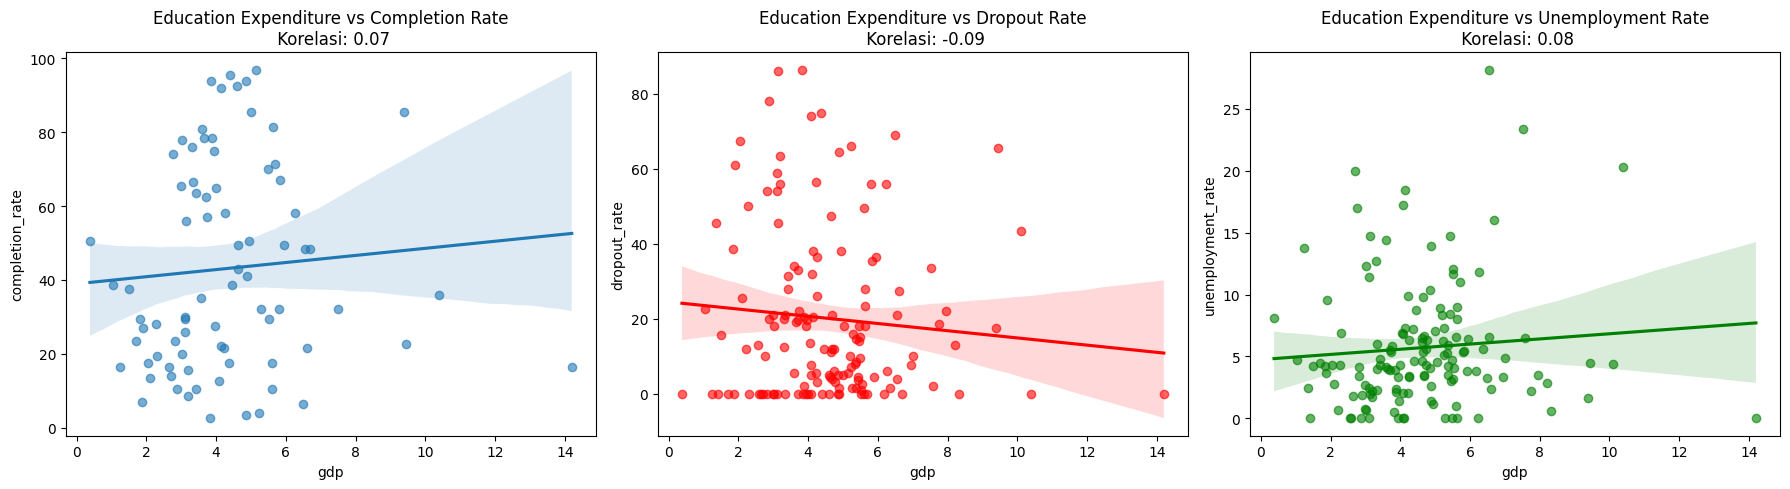

Korelasi Education Expenditure dengan Completion Rate: 0.07
Korelasi Education Expenditure dengan Dropout Rate: -0.09
Korelasi Education Expenditure dengan Unemployment Rate: 0.08


In [28]:
# Hitung korelasi Pearson
correlation_completion, _ = pearsonr(df_cleaned_gdp_cr["gdp"], df_cleaned_gdp_cr["completion_rate"])
correlation_dropout, _ = pearsonr(df_cleaned_gdp["gdp"], df_cleaned_gdp["dropout_rate"])
correlation_unemployment, _ = pearsonr(df_cleaned_gdp["gdp"], df_cleaned_gdp["unemployment_rate"])

# Plot hubungan pengeluaran pendidikan dengan completion rate, dropout rate, dan unemployment rate
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.regplot(x="gdp", y="completion_rate", data=df_cleaned_gdp_cr, ax=axes[0], scatter_kws={"alpha":0.6})
axes[0].set_title(f"Education Expenditure vs Completion Rate\n Korelasi: {correlation_completion:.2f}")

sns.regplot(x="gdp", y="dropout_rate", data=df_cleaned_gdp, ax=axes[1], scatter_kws={"alpha":0.6}, color="red")
axes[1].set_title(f"Education Expenditure vs Dropout Rate\n Korelasi: {correlation_dropout:.2f}")

sns.regplot(x="gdp", y="unemployment_rate", data=df_cleaned_gdp, ax=axes[2], scatter_kws={"alpha":0.6}, color="green")
axes[2].set_title(f"Education Expenditure vs Unemployment Rate\n Korelasi: {correlation_unemployment:.2f}")

plt.tight_layout()
plt.show()

# Tampilkan hasil korelasi
print("Korelasi Education Expenditure dengan Completion Rate:", round(correlation_completion, 2))
print("Korelasi Education Expenditure dengan Dropout Rate:", round(correlation_dropout, 2))
print("Korelasi Education Expenditure dengan Unemployment Rate:", round(correlation_unemployment, 2))


**Pengaruh Kualitas Pendidikan terhadap Faktor Sosial (Kriminalitas & Pengangguran)**

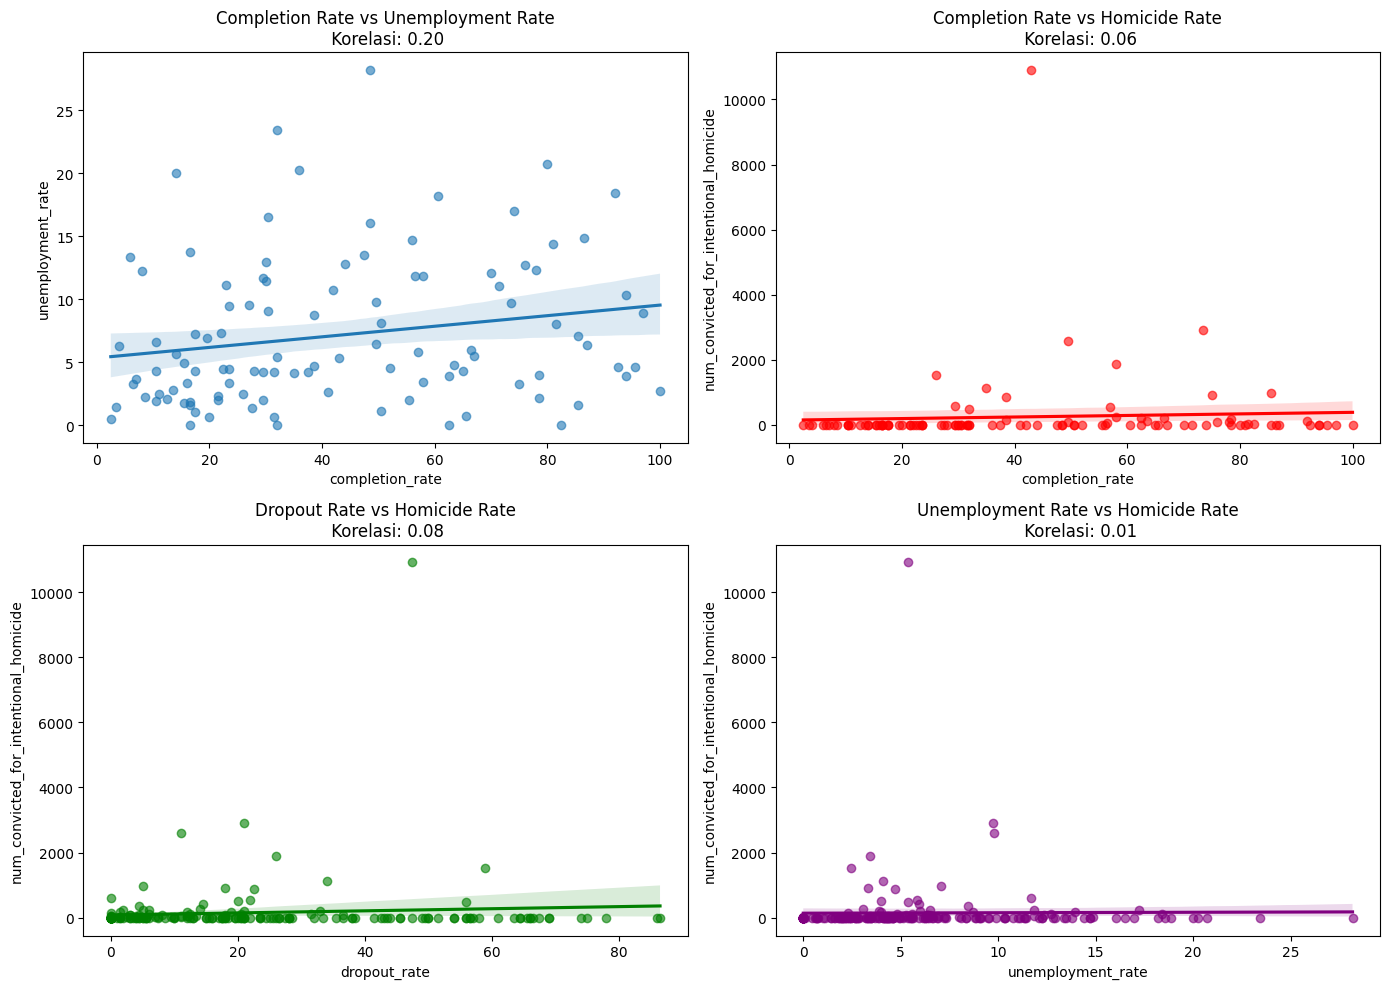

Korelasi Completion Rate dengan Unemployment Rate: 0.2
Korelasi Completion Rate dengan Homicide Rate: 0.06
Korelasi Dropout Rate dengan Homicide Rate: 0.08
Korelasi Unemployment Rate dengan Homicide Rate: 0.01


In [29]:
# Hitung korelasi Pearson
corr_completion_unemployment, _ = pearsonr(df_cleaned_cr["completion_rate"], df_cleaned_cr["unemployment_rate"])
corr_completion_homicide, _ = pearsonr(df_cleaned_cr["completion_rate"], df_cleaned_cr["num_convicted_for_intentional_homicide"])
corr_dropout_homicide, _ = pearsonr(df["dropout_rate"], df["num_convicted_for_intentional_homicide"])
corr_unemployment_homicide, _ = pearsonr(df["unemployment_rate"], df["num_convicted_for_intentional_homicide"])

# Plot hubungan antar variabel
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.regplot(x="completion_rate", y="unemployment_rate", data=df_cleaned_cr, ax=axes[0, 0], scatter_kws={"alpha":0.6})
axes[0, 0].set_title(f"Completion Rate vs Unemployment Rate\n Korelasi: {corr_completion_unemployment:.2f}")

sns.regplot(x="completion_rate", y="num_convicted_for_intentional_homicide", data=df_cleaned_cr, ax=axes[0, 1], scatter_kws={"alpha":0.6}, color="red")
axes[0, 1].set_title(f"Completion Rate vs Homicide Rate\n Korelasi: {corr_completion_homicide:.2f}")

sns.regplot(x="dropout_rate", y="num_convicted_for_intentional_homicide", data=df, ax=axes[1, 0], scatter_kws={"alpha":0.6}, color="green")
axes[1, 0].set_title(f"Dropout Rate vs Homicide Rate\n Korelasi: {corr_dropout_homicide:.2f}")

sns.regplot(x="unemployment_rate", y="num_convicted_for_intentional_homicide", data=df, ax=axes[1, 1], scatter_kws={"alpha":0.6}, color="purple")
axes[1, 1].set_title(f"Unemployment Rate vs Homicide Rate\n Korelasi: {corr_unemployment_homicide:.2f}")

plt.tight_layout()
plt.show()

# Tampilkan hasil korelasi
print("Korelasi Completion Rate dengan Unemployment Rate:", round(corr_completion_unemployment, 2))
print("Korelasi Completion Rate dengan Homicide Rate:", round(corr_completion_homicide, 2))
print("Korelasi Dropout Rate dengan Homicide Rate:", round(corr_dropout_homicide, 2))
print("Korelasi Unemployment Rate dengan Homicide Rate:", round(corr_unemployment_homicide, 2))


Cek normalitas data (Shapiro-Wilk)

In [30]:
# Variabel yang akan diuji
variables = ['completion_rate', 'dropout_rate', 'unemployment_rate']

# Uji normalitas Shapiro-Wilk untuk setiap variabel berdasarkan country_status
for var in variables:
    print(f"\n=== Uji Normalitas Shapiro-Wilk untuk {var} ===")
    for status, subset in df.groupby('country_status'):
        stat, p_value = stats.shapiro(subset[var])
        print(f"{status}: p-value = {p_value:.4f} {'(Tidak Normal)' if p_value < 0.05 else '(Normal)'}")


=== Uji Normalitas Shapiro-Wilk untuk completion_rate ===
Conflict Zone: p-value = 0.0023 (Tidak Normal)
High Income: p-value = 0.0000 (Tidak Normal)
Low Income: p-value = 0.0002 (Tidak Normal)
Middle Income: p-value = 0.0000 (Tidak Normal)
unknown: p-value = 0.0000 (Tidak Normal)

=== Uji Normalitas Shapiro-Wilk untuk dropout_rate ===
Conflict Zone: p-value = 0.0090 (Tidak Normal)
High Income: p-value = 0.0000 (Tidak Normal)
Low Income: p-value = 0.0158 (Tidak Normal)
Middle Income: p-value = 0.0000 (Tidak Normal)
unknown: p-value = 0.0001 (Tidak Normal)

=== Uji Normalitas Shapiro-Wilk untuk unemployment_rate ===
Conflict Zone: p-value = 0.2839 (Normal)
High Income: p-value = 0.0003 (Tidak Normal)
Low Income: p-value = 0.0010 (Tidak Normal)
Middle Income: p-value = 0.0000 (Tidak Normal)
unknown: p-value = 0.0031 (Tidak Normal)


**Apakah ada perbedaan signifikan completion rate berdasarkan country status (high income, middle income, low income & conflict zone)**

Mann-Whitney U Test

In [31]:
# Pastikan kolom kategori benar
print(df_cleaned_cr["country_status"].unique())  # Cek kategori negara

# Pisahkan data berdasarkan kategori
low_income = df_cleaned_cr[df_cleaned_cr["country_status"] == "Low Income"]["completion_rate"]
middle_income = df_cleaned_cr[df_cleaned_cr["country_status"] == "Middle Income"]["completion_rate"]
high_income = df_cleaned_cr[df_cleaned_cr["country_status"] == "High Income"]["completion_rate"]

# Fungsi untuk melakukan uji Mann-Whitney U
def mann_whitney_test(group1, group2, label1, label2):
    stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
    print(f"Uji Mann-Whitney antara {label1} vs {label2}:")
    print(f"  Statistik U: {stat}")
    print(f"  P-Value: {p}")
    if p < 0.05:
        print("  Hasil: Perbedaan signifikan\n")
    else:
        print("  Hasil: Tidak ada perbedaan signifikan\n")

# Melakukan pengujian antar kategori
mann_whitney_test(low_income, middle_income, "Low Income", "Middle Income")
mann_whitney_test(low_income, high_income, "Low Income", "High Income")
mann_whitney_test(middle_income, high_income, "Middle Income", "High Income")

['Conflict Zone' 'Middle Income' 'High Income' 'Low Income' 'unknown']
Uji Mann-Whitney antara Low Income vs Middle Income:
  Statistik U: 201.0
  P-Value: 0.0002247660704422377
  Hasil: Perbedaan signifikan

Uji Mann-Whitney antara Low Income vs High Income:
  Statistik U: 4.5
  P-Value: 0.009280869410531562
  Hasil: Perbedaan signifikan

Uji Mann-Whitney antara Middle Income vs High Income:
  Statistik U: 62.0
  P-Value: 0.12522923173036904
  Hasil: Tidak ada perbedaan signifikan



Visualisasi Boxplot untuk membandingkan Completion Rate berdasarkan klasifikasi ekonomi negara (Low Income, Middle Income, dan High Income)

/var/folders/nk/tj46lgrj24l56dcl01d8smmw0000gn/T/ipykernel_62870/2345583926.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="country_status", y="completion_rate", data=df_cleaned_cr, order=order, palette="muted")


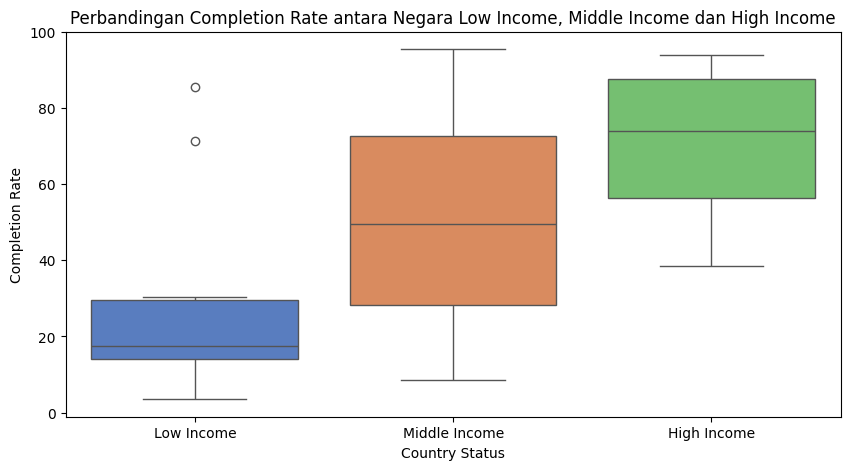

In [32]:
# Pastikan data sudah dalam format yang benar
order = ["Low Income", "Middle Income", "High Income"]  # Urutan kategori

plt.figure(figsize=(10, 5))
sns.boxplot(x="country_status", y="completion_rate", data=df_cleaned_cr, order=order, palette="muted")

plt.title("Perbandingan Completion Rate antara Negara Low Income, Middle Income dan High Income")
plt.xlabel("Country Status")
plt.ylabel("Completion Rate")
plt.show()

## Analisis Part 2

**Top 5 Negara dengan Education Expenditure (%GDP) terbesar**

          country  completion_rate  dropout_rate  unemployment_rate  year  \
93       kiribati             16.5           0.0               0.00  2021   
123       namibia             36.0           0.0              20.27  2021   
160  sierra leone             22.5          65.5               4.43  2021   
45           cuba             85.5          17.5               1.64  2021   
99        lesotho             32.0          33.5              23.41  2021   

       gdp  num_convicted_for_intentional_homicide  rate_per_100k_population  \
93   14.20                                    76.0                  1.346914   
123  10.39                                   729.0                  4.620228   
160   9.44                                  2816.8                  6.786945   
45    9.39                                   441.6                  2.629413   
99    7.51                                  2601.4                  8.247490   

      latitude   longitude    region                    

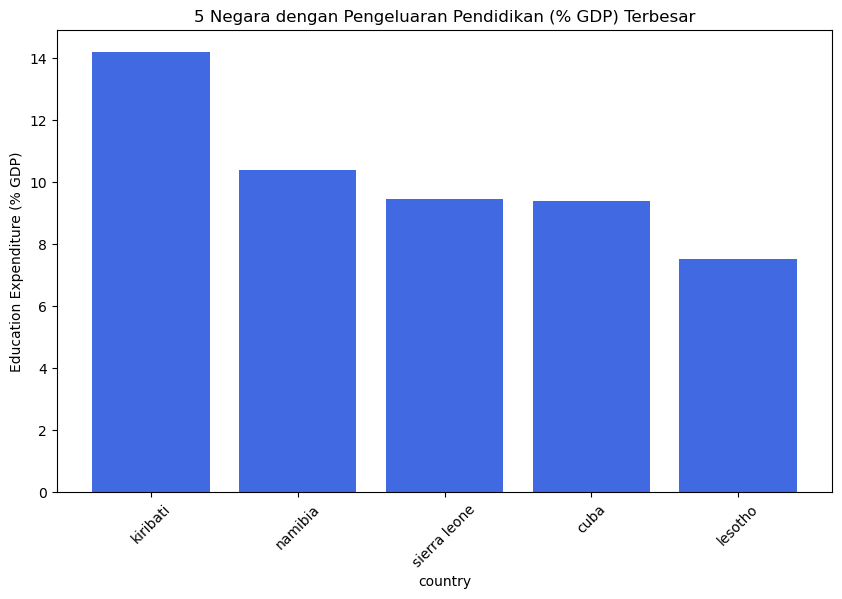

In [31]:
# Ambil 5 negara dengan pengeluaran pendidikan (% GDP) terbesar
top5 = df_cleaned_gdp_cr.sort_values(by="gdp", ascending=False).head(5)

# Tampilkan hasil
print(top5)

# Visualisasi
plt.figure(figsize=(10, 6))
plt.bar(top5["country"], top5["gdp"], color="royalblue")
plt.xlabel("country")
plt.ylabel("Education Expenditure (% GDP)")
plt.title("5 Negara dengan Pengeluaran Pendidikan (% GDP) Terbesar")
plt.xticks(rotation=45)
plt.show()

In [32]:
# Tampilkan hasilnya
print(top5[["country", "gdp", "unemployment_rate", "rate_per_100k_population"]])

          country    gdp  unemployment_rate  rate_per_100k_population
93       kiribati  14.20               0.00                  1.346914
123       namibia  10.39              20.27                  4.620228
160  sierra leone   9.44               4.43                  6.786945
45           cuba   9.39               1.64                  2.629413
99        lesotho   7.51              23.41                  8.247490


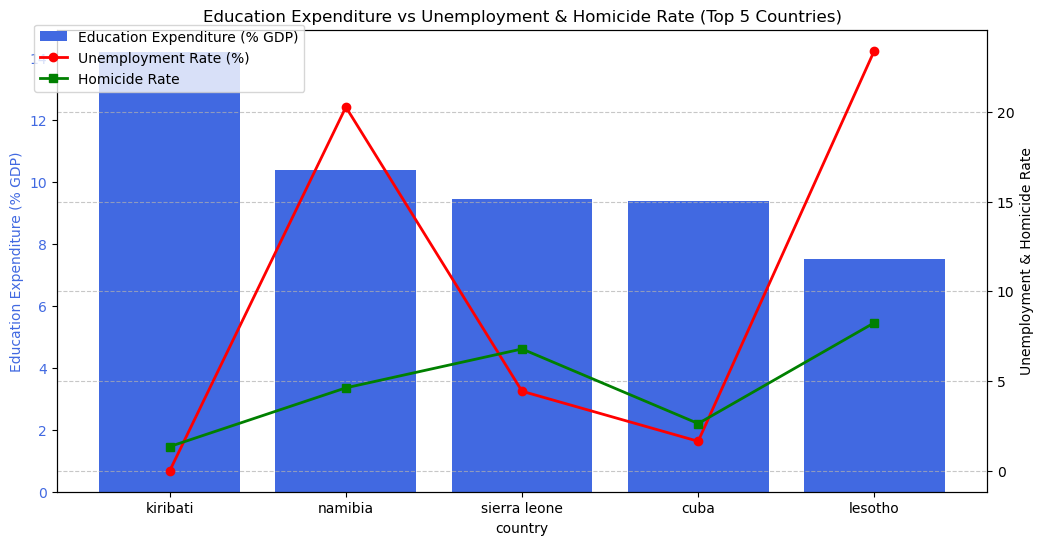

In [33]:
# Ambil 5 negara dengan pengeluaran pendidikan (% GDP) terbesar
top5 = df_cleaned_gdp_cr.sort_values(by="gdp", ascending=False).head(5)

# Visualisasi
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar Chart untuk Education Expenditure
ax1.bar(top5["country"], top5["gdp"], color="royalblue", label="Education Expenditure (% GDP)")
ax1.set_xlabel("country")
ax1.set_ylabel("Education Expenditure (% GDP)", color="royalblue")
ax1.tick_params(axis="y", labelcolor="royalblue")

# Twin axis untuk Unemployment Rate dan Homicide Rate
ax2 = ax1.twinx()
ax2.plot(top5["country"], top5["unemployment_rate"], color="red", marker="o", label="Unemployment Rate (%)", linewidth=2)
ax2.plot(top5["country"], top5["rate_per_100k_population"], color="green", marker="s", label="Homicide Rate", linewidth=2)
ax2.set_ylabel("Unemployment & Homicide Rate", color="black")

# Tambahkan legenda
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

# Tambahkan judul
plt.title("Education Expenditure vs Unemployment & Homicide Rate (Top 5 Countries)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Tampilkan plot
plt.show()

# ---------------------------------------------------------------

**Top 5 Negara dengan Education Expenditure (%GDP) terkecil**

       country  completion_rate  dropout_rate  unemployment_rate  year   gdp  \
130    nigeria             50.5           0.0               8.10  2021  0.38   
82   indonesia             38.5          22.5               4.69  2021  1.03   
76       haiti             16.5           0.0              13.78  2021  1.24   
169  sri lanka             37.5          15.5               4.20  2021  1.51   
135   pakistan             23.5           0.0               4.45  2021  1.69   

     num_convicted_for_intentional_homicide  rate_per_100k_population  \
130                                   729.0                  4.620228   
82                                    869.0                  0.313993   
76                                    291.6                  1.460676   
169                                  1072.0                  6.096567   
135                                   190.2                  1.733984   

      latitude   longitude    region                        subregion  \
130   9

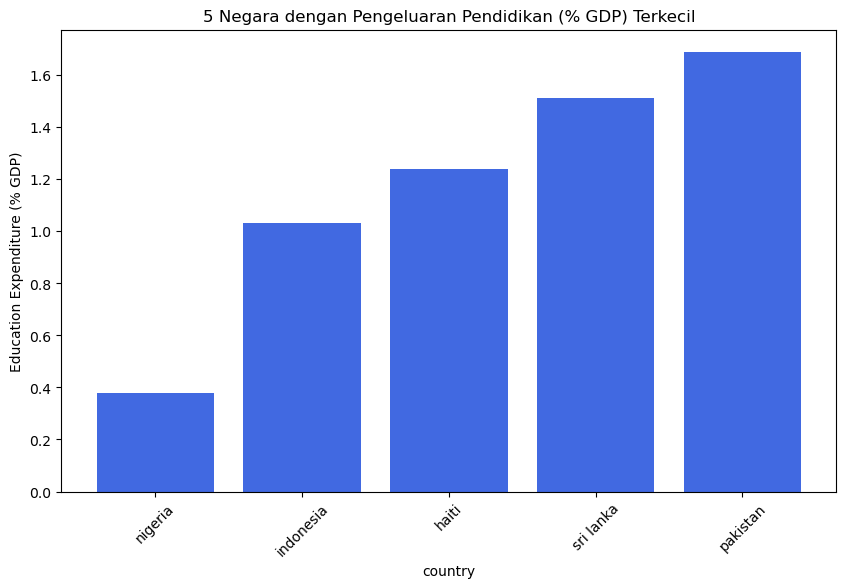

In [34]:
# Ambil 5 negara dengan pengeluaran pendidikan (% GDP) terkecil
bottom5 = df_cleaned_gdp_cr.sort_values(by="gdp", ascending=True).head(5)

# Tampilkan hasil
print(bottom5)

# Visualisasi
plt.figure(figsize=(10, 6))
plt.bar(bottom5["country"], bottom5["gdp"], color="royalblue")
plt.xlabel("country")
plt.ylabel("Education Expenditure (% GDP)")
plt.title("5 Negara dengan Pengeluaran Pendidikan (% GDP) Terkecil")
plt.xticks(rotation=45)
plt.show()

       country   gdp  unemployment_rate  rate_per_100k_population
130    nigeria  0.38               8.10                  4.620228
82   indonesia  1.03               4.69                  0.313993
76       haiti  1.24              13.78                  1.460676
169  sri lanka  1.51               4.20                  6.096567
135   pakistan  1.69               4.45                  1.733984


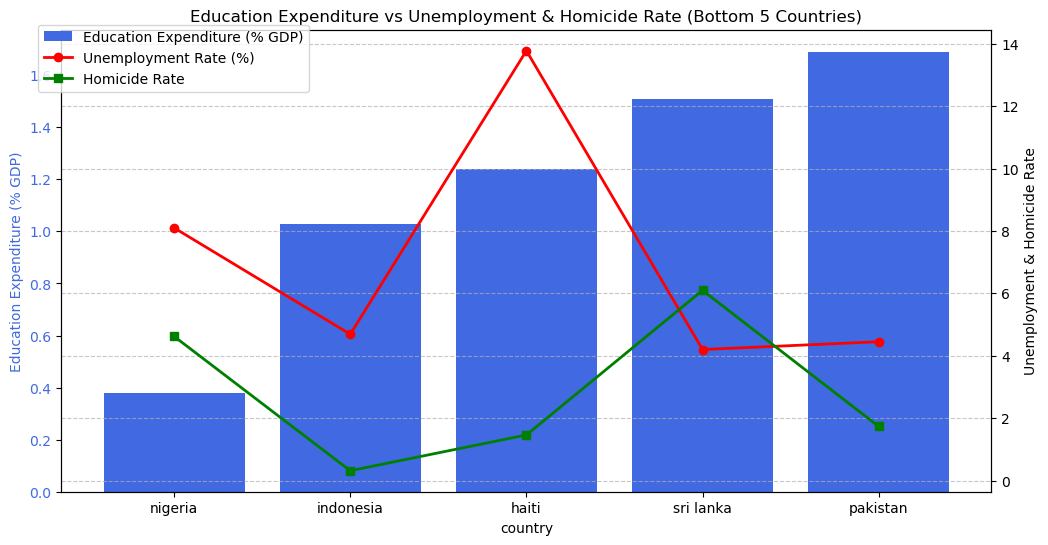

In [36]:
# Ambil 5 negara dengan pengeluaran pendidikan (% GDP) terkecil
bottom5 = df_cleaned_gdp_cr.sort_values(by="gdp", ascending=True).head(5)

# Tampilkan hasil
print(bottom5[["country", "gdp", "unemployment_rate", "rate_per_100k_population"]])

# Visualisasi
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar Chart untuk Education Expenditure
ax1.bar(bottom5["country"], bottom5["gdp"], color="royalblue", label="Education Expenditure (% GDP)")
ax1.set_xlabel("country")
ax1.set_ylabel("Education Expenditure (% GDP)", color="royalblue")
ax1.tick_params(axis="y", labelcolor="royalblue")

# Twin axis untuk Unemployment Rate dan Homicide Rate
ax2 = ax1.twinx()
ax2.plot(bottom5["country"], bottom5["unemployment_rate"], color="red", marker="o", label="Unemployment Rate (%)", linewidth=2)
ax2.plot(bottom5["country"], bottom5["rate_per_100k_population"], color="green", marker="s", label="Homicide Rate", linewidth=2)
ax2.set_ylabel("Unemployment & Homicide Rate", color="black")

# Tambahkan legenda
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

# Tambahkan judul
plt.title("Education Expenditure vs Unemployment & Homicide Rate (Bottom 5 Countries)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Tampilkan plot
plt.show()

In [104]:
# Tabel perbandingan (Top 5 vs Bottom 5)

# Ambil 5 negara dengan Education Expenditure terbesar & terkecil
top5 = df_cleaned_gdp_cr.sort_values(by="gdp", ascending=False).head(5)
bottom5 = df_cleaned_gdp_cr.sort_values(by="gdp", ascending=True).head(5)

# Gabungkan kedua tabel untuk perbandingan
comparison = pd.concat([top5, bottom5])
print(comparison[["country", "gdp", "unemployment_rate", "rate_per_100k_population"]])

          country    gdp  unemployment_rate  rate_per_100k_population
93       kiribati  14.20               0.00                  0.000000
123       namibia  10.39              20.27                  0.000000
160  sierra leone   9.44               4.43                  0.000000
45           cuba   9.39               1.64                  0.000000
99        lesotho   7.51              23.41                  0.000000
130       nigeria   0.38               8.10                  0.000000
82      indonesia   1.03               4.69                  0.313993
76          haiti   1.24              13.78                  0.000000
169     sri lanka   1.51               4.20                  0.000000
135      pakistan   1.69               4.45                  0.000000


In [ ]:
# Tabel Perbandingan

# Ambil 5 negara dengan Education Expenditure terbesar & terkecil
top5 = df_cleaned_gdp.sort_values(by="gdp", ascending=False).head(5)
bottom5 = df_cleaned_gdp.sort_values(by="gdp", ascending=True).head(5)

# Gabungkan kedua tabel untuk perbandingan
comparison = pd.concat([top5, bottom5])

# Pilih kolom yang relevan
columns_to_display = ["country", "gdp", "unemployment_rate", "rate_per_100k_population"]
print(comparison[columns_to_display])

              country    gdp  unemployment_rate  rate_per_100k_population
93           kiribati  14.20               0.00                  0.000000
123           namibia  10.39              20.27                  0.000000
196           vanuatu  10.11               4.39                  0.000000
160      sierra leone   9.44               4.43                  0.000000
45               cuba   9.39               1.64                  0.000000
130           nigeria   0.38               8.10                  0.000000
82          indonesia   1.03               4.69                  0.313993
76              haiti   1.24              13.78                  0.000000
138  papua new guinea   1.35               2.46                  0.000000
116            monaco   1.42               0.00                  0.000000


## Analisis Part 3

Tujuan : Melihat bagaimana sebaran pengeluaran pendidikan di berbagai negara. Apakah banyak negara mengalokasikan dana pendidikan tinggi atau rendah?

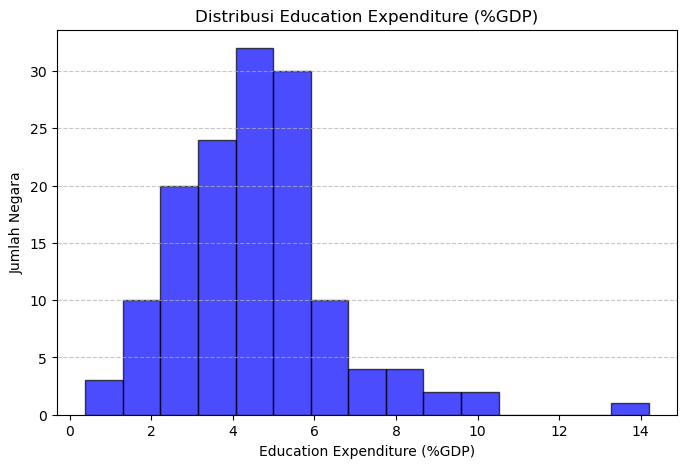

In [30]:
# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(df_cleaned_gdp["gdp"], bins=15, color="blue", edgecolor="black", alpha=0.7)
plt.xlabel("Education Expenditure (%GDP)")
plt.ylabel("Jumlah Negara")
plt.title("Distribusi Education Expenditure (%GDP)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Insight : 
- Apakah lebih banyak negara mengalokasikan dana pendidikan di bawah 5% GDP atau di atas 5%?
- Apakah ada negara yang mengalokasikan dana sangat besar (>10% GDP)?

**Identifikasi Negara dengan Pengeluaran Pendidikan Optimal**

In [89]:
df_cleaned_gdp["Spending Category"] = pd.cut(df_cleaned_gdp["gdp"], bins=[0, 3, 6, 15], labels=["Low", "Medium", "High"])

grouped = df_cleaned_gdp.groupby("Spending Category").agg({
    "completion_rate": "mean",
    "unemployment_rate": "mean"
})

print(grouped)

                   completion_rate  unemployment_rate
Spending Category                                    
Low                      19.711538           4.838462
Medium                   26.760638           5.616489
High                     17.068182           7.075000


/var/folders/nk/tj46lgrj24l56dcl01d8smmw0000gn/T/ipykernel_62870/1989696518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_gdp["Spending Category"] = pd.cut(df_cleaned_gdp["gdp"], bins=[0, 3, 6, 15], labels=["Low", "Medium", "High"])
/var/folders/nk/tj46lgrj24l56dcl01d8smmw0000gn/T/ipykernel_62870/1989696518.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_cleaned_gdp.groupby("Spending Category").agg({


Insight : 

- Apakah pengeluaran pendidikan yang lebih tinggi selalu menghasilkan completion rate lebih tinggi dan pengangguran lebih rendah?
- Apakah ada titik optimal pengeluaran pendidikan di mana efeknya paling maksimal?

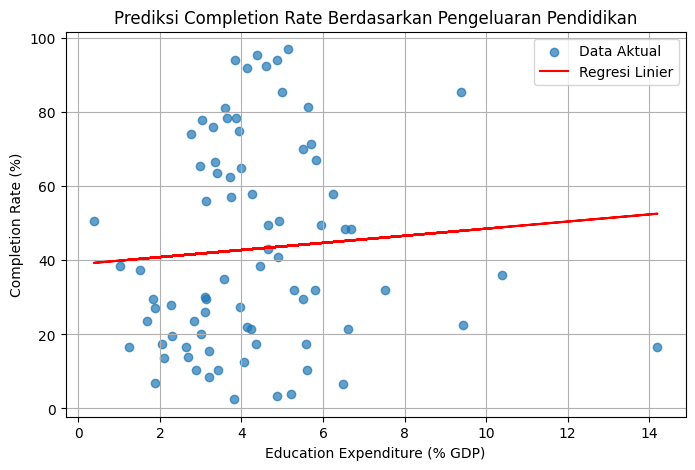

R²: 0.01


In [90]:
from sklearn.linear_model import LinearRegression

# Persiapan data
X = df_cleaned_gdp_cr[["gdp"]]
y = df_cleaned_gdp_cr["completion_rate"]

# Buat model regresi
model = LinearRegression()
model.fit(X, y)

# Prediksi dan plot hasil regresi
plt.figure(figsize=(8, 5))
plt.scatter(X, y, alpha=0.7, label="Data Aktual")
plt.plot(X, model.predict(X), color="red", label="Regresi Linier")
plt.xlabel("Education Expenditure (% GDP)")
plt.ylabel("Completion Rate (%)")
plt.title("Prediksi Completion Rate Berdasarkan Pengeluaran Pendidikan")
plt.legend()
plt.grid(True)
plt.show()

# Nilai R-squared
r_squared = model.score(X, y)
print(f"R²: {r_squared:.2f}")

R² (Akurasi Model): 0.15


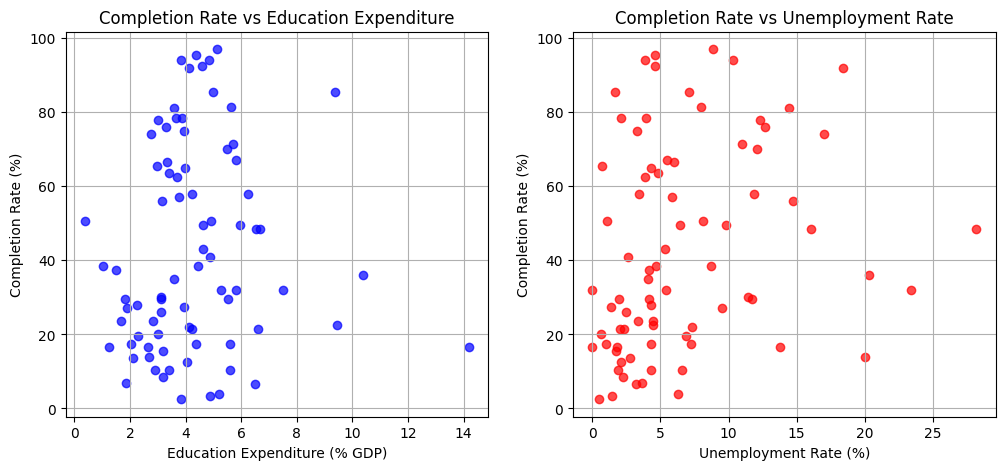

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


# Ambil variabel yang diperlukan
X = df_cleaned_gdp_cr[["gdp", "unemployment_rate"]].dropna()
y = df_cleaned_gdp_cr["completion_rate"].dropna()

# Split data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model regresi linear multiple
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi model
r_squared = r2_score(y_test, y_pred)
print(f"R² (Akurasi Model): {r_squared:.2f}")

# Visualisasi scatter plot pengaruh kedua variabel terhadap Completion Rate
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot untuk Education Expenditure vs Completion Rate
ax[0].scatter(df_cleaned_gdp_cr["gdp"], df_cleaned_gdp_cr["completion_rate"], alpha=0.7, color="blue")
ax[0].set_xlabel("Education Expenditure (% GDP)")
ax[0].set_ylabel("Completion Rate (%)")
ax[0].set_title("Completion Rate vs Education Expenditure")
ax[0].grid(True)

# Scatter plot untuk Unemployment Rate vs Completion Rate
ax[1].scatter(df_cleaned_gdp_cr["unemployment_rate"], df_cleaned_gdp_cr["completion_rate"], alpha=0.7, color="red")
ax[1].set_xlabel("Unemployment Rate (%)")
ax[1].set_ylabel("Completion Rate (%)")
ax[1].set_title("Completion Rate vs Unemployment Rate")
ax[1].grid(True)

plt.show()

## Analisis Part 4

Top 5 education expenditure vs completion rate & dropout rate

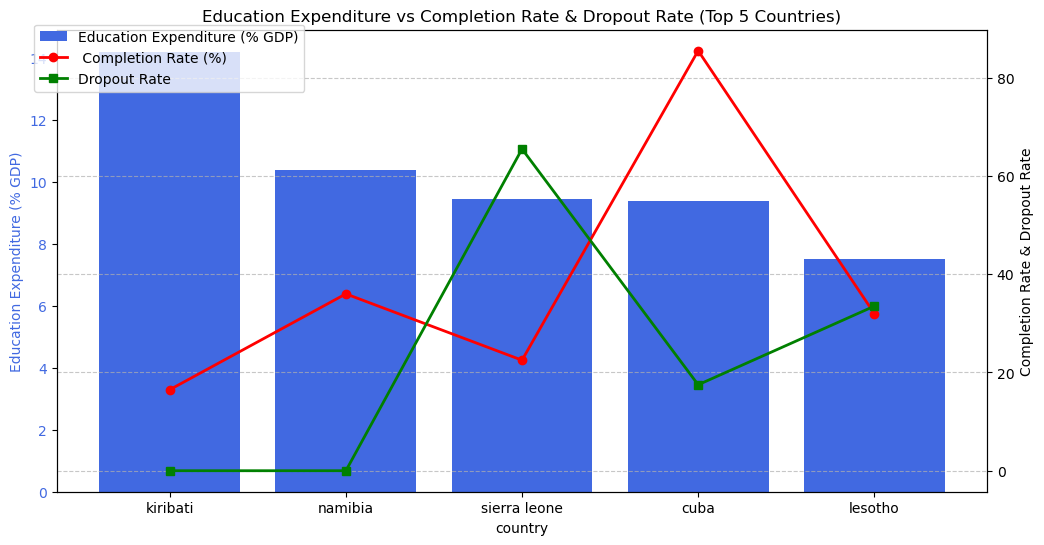

In [37]:
# Ambil 5 negara dengan pengeluaran pendidikan (% GDP) terbesar
top5 = df_cleaned_gdp_cr.sort_values(by="gdp", ascending=False).head(5)

# Visualisasi
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar Chart untuk Education Expenditure
ax1.bar(top5["country"], top5["gdp"], color="royalblue", label="Education Expenditure (% GDP)")
ax1.set_xlabel("country")
ax1.set_ylabel("Education Expenditure (% GDP)", color="royalblue")
ax1.tick_params(axis="y", labelcolor="royalblue")

# Twin axis untuk Unemployment Rate dan Homicide Rate
ax2 = ax1.twinx()
ax2.plot(top5["country"], top5["completion_rate"], color="red", marker="o", label=" Completion Rate (%)", linewidth=2)
ax2.plot(top5["country"], top5["dropout_rate"], color="green", marker="s", label="Dropout Rate", linewidth=2)
ax2.set_ylabel("Completion Rate & Dropout Rate", color="black")

# Tambahkan legenda
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

# Tambahkan judul
plt.title("Education Expenditure vs Completion Rate & Dropout Rate (Top 5 Countries)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Tampilkan plot
plt.show()

In [34]:
df_completion_0 = df_cleaned_gdp[df_cleaned_gdp["completion_rate"] == 0][["country", "completion_rate"]]
print(df_completion_0)

                 country  completion_rate
3                andorra              0.0
5               anguilla              0.0
6    antigua and barbuda              0.0
9              australia              0.0
10               austria              0.0
..                   ...              ...
191       united kingdom              0.0
193        united states              0.0
195           uzbekistan              0.0
196              vanuatu              0.0
197            venezuela              0.0

[95 rows x 2 columns]


In [35]:
print(df[df["completion_rate"] == 0]["country"].nunique())

95


In [33]:
df_vanuatu = df_cleaned_gdp[df["country"] == "vanuatu"]
print(df_vanuatu)

     country  completion_rate  dropout_rate  unemployment_rate  year    gdp  \
196  vanuatu              0.0          43.5               4.39  2021  10.11   

     num_convicted_for_intentional_homicide  rate_per_100k_population  \
196                                   114.2                  1.336652   

      latitude   longitude   region  subregion country_code country_status  
196  15.376706  166.959158  Oceania  Melanesia          VUT  Middle Income  


Bottom 5 education expenditure vs completion rate & dropout rate

       country   gdp  completion_rate  dropout_rate
130    nigeria  0.38             50.5           0.0
82   indonesia  1.03             38.5          22.5
76       haiti  1.24             16.5           0.0
169  sri lanka  1.51             37.5          15.5
135   pakistan  1.69             23.5           0.0


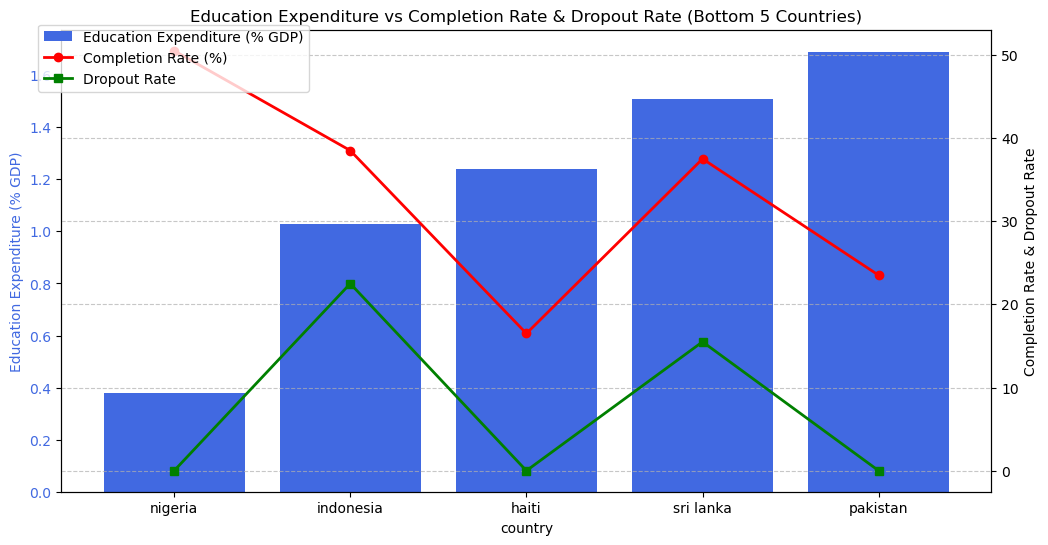

In [38]:
# Ambil 5 negara dengan pengeluaran pendidikan (% GDP) terkecil
bottom5 = df_cleaned_gdp_cr.sort_values(by="gdp", ascending=True).head(5)

# Tampilkan hasil
print(bottom5[["country", "gdp", "completion_rate", "dropout_rate"]])

# Visualisasi
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar Chart untuk Education Expenditure
ax1.bar(bottom5["country"], bottom5["gdp"], color="royalblue", label="Education Expenditure (% GDP)")
ax1.set_xlabel("country")
ax1.set_ylabel("Education Expenditure (% GDP)", color="royalblue")
ax1.tick_params(axis="y", labelcolor="royalblue")

# Twin axis untuk Unemployment Rate dan Homicide Rate
ax2 = ax1.twinx()
ax2.plot(bottom5["country"], bottom5["completion_rate"], color="red", marker="o", label="Completion Rate (%)", linewidth=2)
ax2.plot(bottom5["country"], bottom5["dropout_rate"], color="green", marker="s", label="Dropout Rate", linewidth=2)
ax2.set_ylabel("Completion Rate & Dropout Rate", color="black")

# Tambahkan legenda
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

# Tambahkan judul
plt.title("Education Expenditure vs Completion Rate & Dropout Rate (Bottom 5 Countries)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Tampilkan plot
plt.show()

## Analisis 5

In [39]:
df_cleaned_gdp_cr[["gdp", "completion_rate", "dropout_rate", "unemployment_rate", "rate_per_100k_population"]].corr()

,gdp,completion_rate,dropout_rate,unemployment_rate,rate_per_100k_population
gdp,1.000000,0.093385,-0.077104,0.084597,0.024796
completion_rate,0.093385,1.000000,-0.461968,0.198503,-0.254144
dropout_rate,-0.077104,-0.461968,1.000000,-0.249113,0.513693
unemployment_rate,0.084597,0.198503,-0.249113,1.000000,-0.068639
rate_per_100k_population,0.024796,-0.254144,0.513693,-0.068639,1.000000


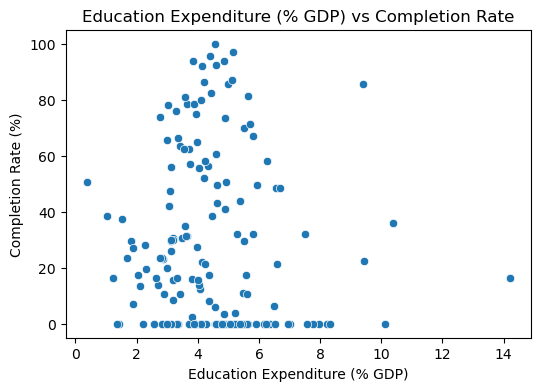

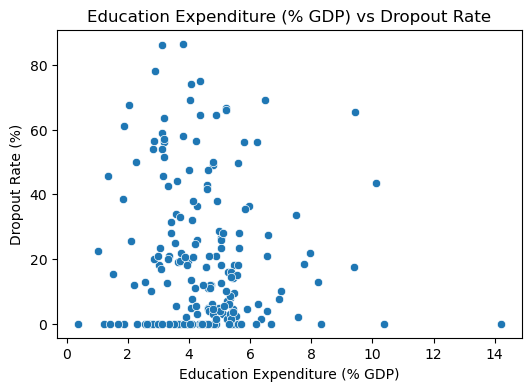

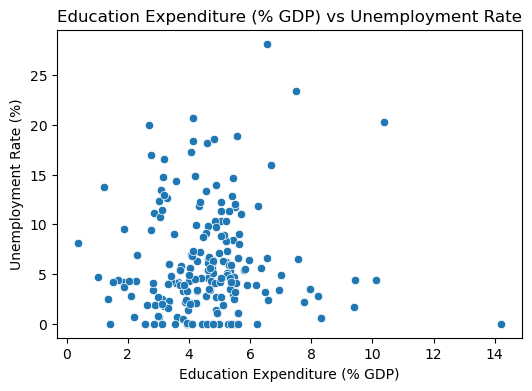

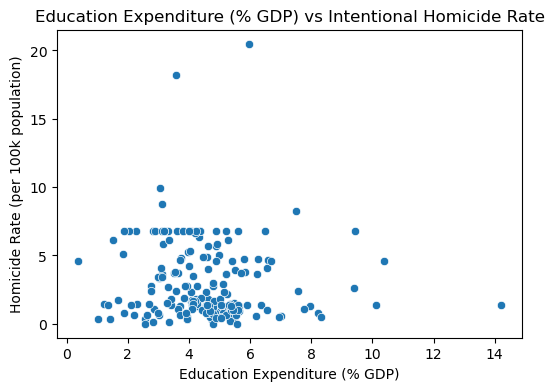

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot GDP vs Completion Rate
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["gdp"], y=df["completion_rate"])
plt.title("Education Expenditure (% GDP) vs Completion Rate")
plt.xlabel("Education Expenditure (% GDP)")
plt.ylabel("Completion Rate (%)")
plt.show()

# Scatter plot GDP vs Dropout Rate
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["gdp"], y=df["dropout_rate"])
plt.title("Education Expenditure (% GDP) vs Dropout Rate")
plt.xlabel("Education Expenditure (% GDP)")
plt.ylabel("Dropout Rate (%)")
plt.show()

# Scatter plot GDP vs Unemployment Rate
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["gdp"], y=df["unemployment_rate"])
plt.title("Education Expenditure (% GDP) vs Unemployment Rate")
plt.xlabel("Education Expenditure (% GDP)")
plt.ylabel("Unemployment Rate (%)")
plt.show()

# Scatter plot GDP vs Intentional Homicide Rate
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["gdp"], y=df["rate_per_100k_population"])
plt.title("Education Expenditure (% GDP) vs Intentional Homicide Rate")
plt.xlabel("Education Expenditure (% GDP)")
plt.ylabel("Homicide Rate (per 100k population)")
plt.show()

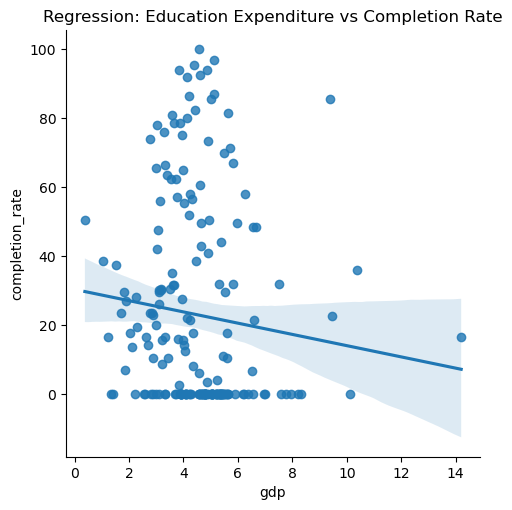

In [41]:
# Regression Plot GDP vs Completion Rate
sns.lmplot(x="gdp", y="completion_rate", data=df)
plt.title("Regression: Education Expenditure vs Completion Rate")
plt.show()

## Analisis 6

          country  completion_rate  dropout_rate  unemployment_rate  year  \
48    north korea            100.0           0.0               2.74  2021   
189       ukraine             97.0           5.5               8.88  2021   
91     kazakhstan             95.5           0.0               4.59  2021   
15       barbados             94.0           5.0              10.33  2021   
185  turkmenistan             94.0           0.0               3.91  2021   

      gdp  num_convicted_for_intentional_homicide  rate_per_100k_population  \
48   4.57                                   224.0                  2.298375   
189  5.14                                   224.0                  2.298375   
91   4.39                                   222.6                  1.912048   
15   4.86                                     1.0                  0.354426   
185  3.85                                   222.6                  1.912048   

      latitude   longitude    region                        su

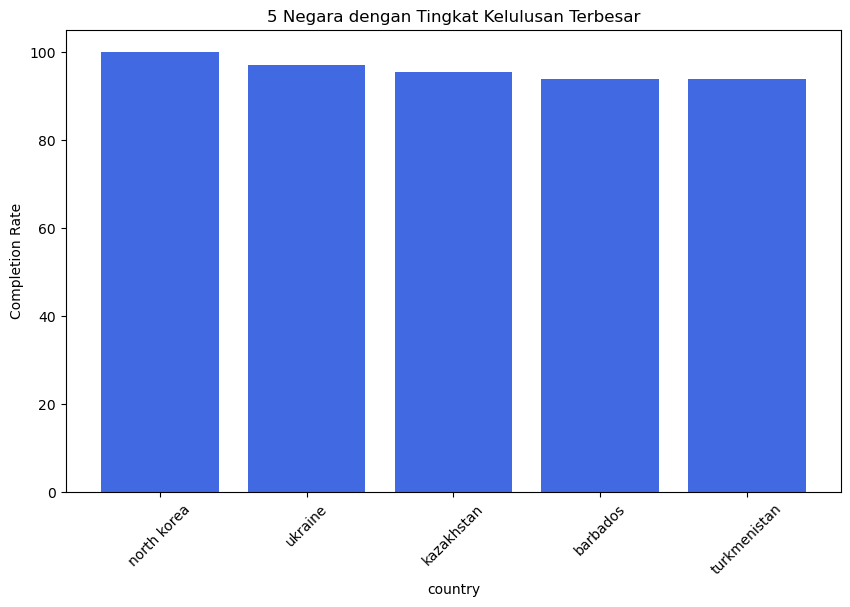

In [43]:
# Ambil 5 negara dengan pengeluaran pendidikan (% GDP) terbesar
top5 = df_cleaned_gdp_cr.sort_values(by="completion_rate", ascending=False).head(5)

# Tampilkan hasil
print(top5)

# Visualisasi
plt.figure(figsize=(10, 6))
plt.bar(top5["country"], top5["completion_rate"], color="royalblue")
plt.xlabel("country")
plt.ylabel("Completion Rate")
plt.title("5 Negara dengan Tingkat Kelulusan Terbesar")
plt.xticks(rotation=45)
plt.show()

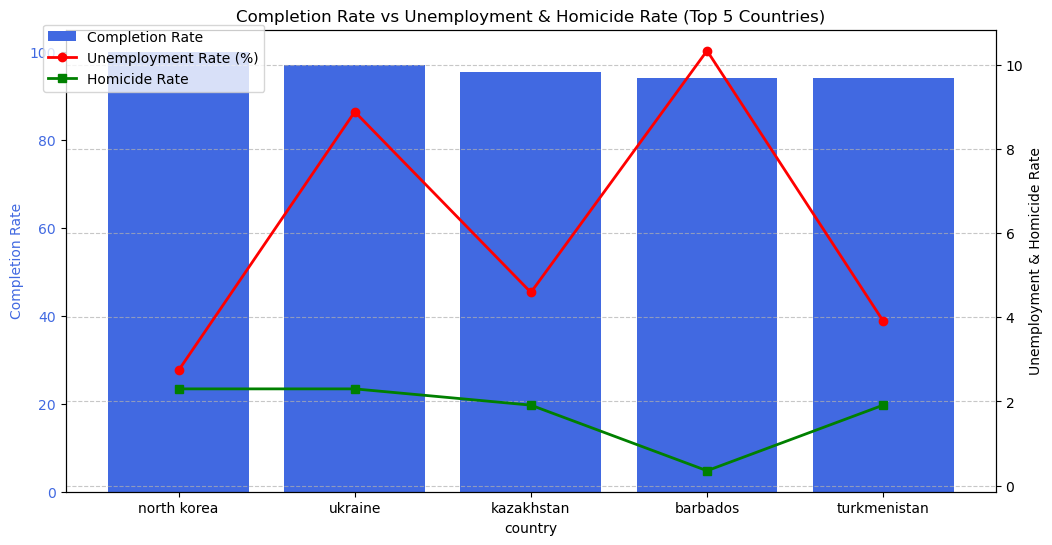

In [44]:
# Ambil 5 negara dengan pengeluaran pendidikan (% GDP) terbesar
top5 = df_cleaned_gdp_cr.sort_values(by="completion_rate", ascending=False).head(5)

# Visualisasi
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar Chart untuk Education Expenditure
ax1.bar(top5["country"], top5["completion_rate"], color="royalblue", label="Completion Rate")
ax1.set_xlabel("country")
ax1.set_ylabel("Completion Rate", color="royalblue")
ax1.tick_params(axis="y", labelcolor="royalblue")

# Twin axis untuk Unemployment Rate dan Homicide Rate
ax2 = ax1.twinx()
ax2.plot(top5["country"], top5["unemployment_rate"], color="red", marker="o", label="Unemployment Rate (%)", linewidth=2)
ax2.plot(top5["country"], top5["rate_per_100k_population"], color="green", marker="s", label="Homicide Rate", linewidth=2)
ax2.set_ylabel("Unemployment & Homicide Rate", color="black")

# Tambahkan legenda
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

# Tambahkan judul
plt.title("Completion Rate vs Unemployment & Homicide Rate (Top 5 Countries)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Tampilkan plot
plt.show()

          country  completion_rate  dropout_rate  unemployment_rate  year  \
129         niger              2.5          86.5               0.47  2021   
29        burundi              3.5          64.5               1.43  2021   
28   burkina faso              4.0          66.0               6.26  2021   
155     s��������              6.0          17.5              13.37  2021   
121    mozambique              6.5          69.0               3.24  2021   

       gdp  num_convicted_for_intentional_homicide  rate_per_100k_population  \
129  3.820                                  2816.8                  6.786945   
29   4.870                                  2816.8                  6.786945   
28   5.220                                  2816.8                  6.786945   
155  4.572                                   107.6                  0.794574   
121  6.500                                  2816.8                  6.786945   

      latitude  longitude   region           subregion c

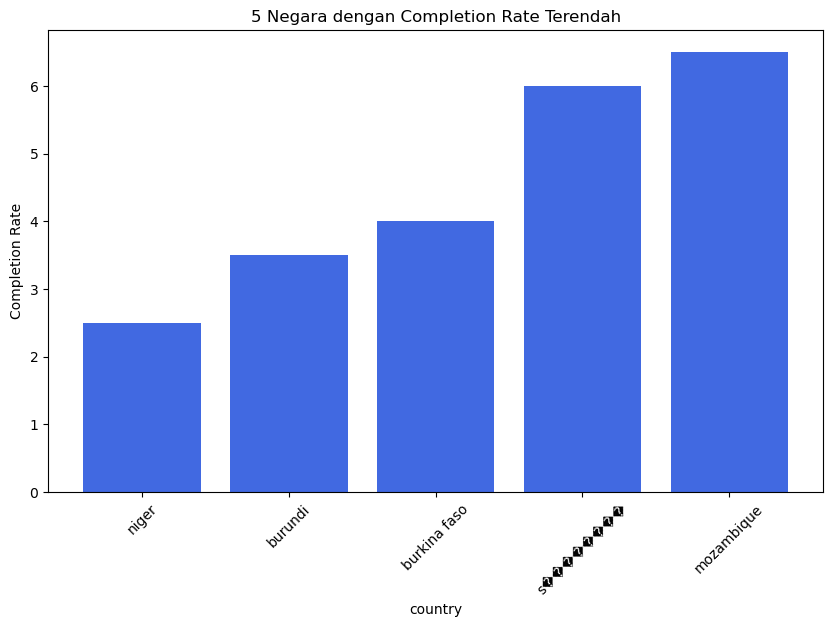

In [45]:
# Ambil 5 negara dengan pengeluaran pendidikan (% GDP) terkecil
bottom5 = df_cleaned_gdp_cr.sort_values(by="completion_rate", ascending=True).head(5)

# Tampilkan hasil
print(bottom5)

# Visualisasi
plt.figure(figsize=(10, 6))
plt.bar(bottom5["country"], bottom5["completion_rate"], color="royalblue")
plt.xlabel("country")
plt.ylabel("Completion Rate")
plt.title("5 Negara dengan Completion Rate Terendah")
plt.xticks(rotation=45)
plt.show()